In [1]:
import pandas as pd

# Load the user data
users_df = pd.read_csv('takehome_users.csv', encoding='ISO-8859-1')

# Load the user engagement data
engagement_df = pd.read_csv('takehome_user_engagement.csv')

# Inspect the first few rows of both datasets
print(users_df.head())
print(engagement_df.head())

   object_id        creation_time               name  \
0          1  2014-04-22 03:53:30     Clausen August   
1          2  2013-11-15 03:45:04      Poole Matthew   
2          3  2013-03-19 23:14:52  Bottrill Mitchell   
3          4  2013-05-21 08:09:28    Clausen Nicklas   
4          5  2013-01-17 10:14:20          Raw Grace   

                        email creation_source  last_session_creation_time  \
0    AugustCClausen@yahoo.com    GUEST_INVITE                1.398139e+09   
1      MatthewPoole@gustr.com      ORG_INVITE                1.396238e+09   
2  MitchellBottrill@gustr.com      ORG_INVITE                1.363735e+09   
3   NicklasSClausen@yahoo.com    GUEST_INVITE                1.369210e+09   
4          GraceRaw@yahoo.com    GUEST_INVITE                1.358850e+09   

   opted_in_to_mailing_list  enabled_for_marketing_drip  org_id  \
0                         1                           0      11   
1                         0                           0       1   

In [2]:
# Convert the 'time_stamp' in engagement_df to datetime
engagement_df['time_stamp'] = pd.to_datetime(engagement_df['time_stamp'])

# Group by user and count distinct login days
engagement_df['date'] = engagement_df['time_stamp'].dt.date
user_logins = engagement_df.groupby('user_id')['date'].nunique()

# Identify adopted users
adopted_users = user_logins[user_logins >= 3].index

# Create a new column in the user dataframe to flag adopted users
users_df['adopted_user'] = users_df['object_id'].isin(adopted_users).astype(int)

# Check the result
print(users_df[['object_id', 'adopted_user']].head())

   object_id  adopted_user
0          1             0
1          2             1
2          3             0
3          4             0
4          5             0


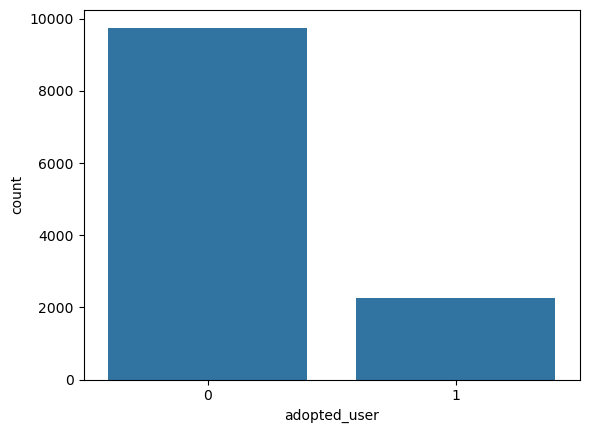

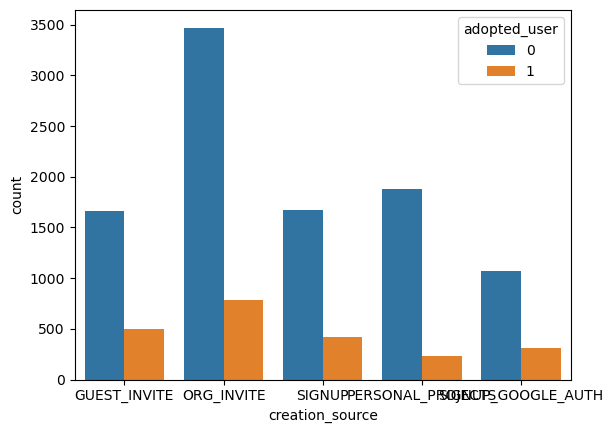

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of adopted vs non-adopted users
sns.countplot(x='adopted_user', data=users_df)
plt.show()

# Analyze creation source distribution
sns.countplot(x='creation_source', hue='adopted_user', data=users_df)
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Prepare data for modeling
X = users_df[['creation_source', 'opted_in_to_mailing_list', 'enabled_for_marketing_drip']]
X = pd.get_dummies(X)  # One-hot encode categorical variables
y = users_df['adopted_user']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')


Accuracy: 0.815


In [5]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      1.00      0.90      1956
           1       0.00      0.00      0.00       444

    accuracy                           0.81      2400
   macro avg       0.41      0.50      0.45      2400
weighted avg       0.66      0.81      0.73      2400



/opt/anaconda3/envs/test/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/test/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/test/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In this analysis, I aimed to predict user adoption, defining as logging in on three separate days within a seven-day period, using a dataset of user information and engagement history. 

The model achieved an accuracy of 81.5%, but it struggled to predict the minority class (adopted users), as shown by the 0 precision, recall, and F1-score for this group